In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from simulate import simulate_games

%matplotlib inline
    
def compare_box_and_whiskers(perks, attack_sequence, iterations):
    perk_results = [
        perk_result(perk_name, deck, attack_sequence, iterations) 
        for perk_name, deck in perks.items()
    ]
    
    plt.boxplot(
        [perk_result['samples'] for perk_result in perk_results],
        labels=[perk_result['title'] for perk_result in perk_results]
    );
    plt.title('Comparison of Perks');
    plt.xlabel('perk');
    plt.xticks(rotation=45)
    plt.ylabel('bonus damage');
    
def perk_result(perk_name, deck, attack_sequence, iterations): 
    damage_samples = np.array(simulate_games(deck, attack_sequence, iterations))
    mean_damage = damage_samples.mean()
    std_dev = damage_samples.std()/np.sqrt(iterations)
    return {
        'samples': [
            mean_damage - std_dev, 
            mean_damage, 
            mean_damage + std_dev,
        ],
        'title': '{perk_name} - Mean: {mean} +/- {stddev}'.format(
            perk_name=perk_name,
            mean=round(mean_damage, 3),
            stddev=round(std_dev, 3),
        ),
    }

START = {
    'miss': 1,
    -2: 1,
    -1: 5,
    0: 6,
    1: 5,
    2: 1,
    'crit': 1,
}
PERKS = {
    'Start': START,
    'Remove 0 0 0 0': {
        **START,
        0: 2,
    },
    'Add +2': {
        **START,
        2: 2,
    },
    'Replace -1 => +1': {
        **START,
        -1: 4,
        1: 6,
    },
}

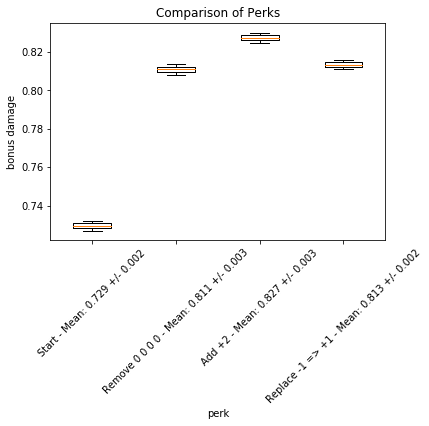

In [7]:
compare_box_and_whiskers(
    PERKS, 
    [
        dict(base=3),
        dict(base=3, advantage=True, targets=3),
        dict(base=2),

        dict(base=3),
        dict(base=3, advantage=True),

        dict(base=4, advantage=True, targets=3),
        dict(base=2),

        dict(base=3, advantage=True),

        dict(base=3, advantage=True, targets=3),
        dict(base=3),
        dict(base=2),
    ],
    10000,
)